In [1]:
from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install pandas fastparquet
!pip install dask[dataframe]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import dask.dataframe as dd


Parent = '/content/gdrive/MyDrive/RoadCharge/'
# for dirname, _, filenames in os.walk(Parent+'nyc-fhvhv-data/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


fpath = Parent+'nyc-fhvhv-data/'
# list_2019 = [files for files in os.listdir(fpath) if '_2019-' in files]
# list_2019.sort()
# print('list_2019:', list_2019)


# fhv_files=[]
# columns_we_care = ['request_datetime','pickup_datetime','dropoff_datetime','trip_miles',
#                    'trip_time','congestion_surcharge','airport_fee','base_passenger_fare']
# for _ in list_2019:
#     print(_)
#     fhv_files.append(dd.read_parquet(fpath + _, columns=columns_we_care).sample(frac=0.0001, random_state=42).compute())

# print(len(fhv_files))

# # df = pd.concat(fhv_files, ignore_index=True)

# # # Delete fares above to 80
# # df2 = df[df['base_passenger_fare'] < 80 ]
# # print((len(df2)/len(df))*100)

# # # pickup time and trip time in minutes
# # df2['pickup_time'] = round((df2['pickup_datetime'] - df2['request_datetime']).dt.total_seconds() / 60.0,3)
# # df2['trip_time_real'] = round((df2['dropoff_datetime'] - df2['pickup_datetime']).dt.total_seconds() / 60.0,3)



In [11]:
# df = pd.concat(fhv_files, ignore_index=True)

In [14]:
# df.to_parquet(fpath+'concat_2019', index=False)
df = dd.read_parquet(fpath+'concat_2019').compute()

In [15]:
df.head(3)

,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,congestion_surcharge,airport_fee,base_passenger_fare
0,2019-02-28 00:20:45,2019-02-28 00:24:54,2019-02-28 00:42:46,3.53,1072,0.75,None,8.29
1,2019-02-24 11:18:55,2019-02-24 11:22:50,2019-02-24 11:36:38,2.35,827,2.75,None,19.82
2,2019-02-03 04:13:30,2019-02-03 04:25:59,2019-02-03 04:57:48,15.32,1909,0.00,None,25.76


In [17]:
# Delete fares above to 80
df2 = df[df['base_passenger_fare'] < 80 ]
print((len(df2)/len(df))*100)

# pickup time and trip time in minutes
df2.loc[:, 'pickup_time'] = ((df2['pickup_datetime'] - df2['request_datetime']).dt.total_seconds() / 60.0).round(3)
df2.loc[:, 'trip_time_real'] = ((df2['dropoff_datetime'] - df2['pickup_datetime']).dt.total_seconds() / 60.0).round(3)

98.81936748785269


<ipython-input-17-912f29de1fd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'pickup_time'] = ((df2['pickup_datetime'] - df2['request_datetime']).dt.total_seconds() / 60.0).round(3)
<ipython-input-17-912f29de1fd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'trip_time_real'] = ((df2['dropoff_datetime'] - df2['pickup_datetime']).dt.total_seconds() / 60.0).round(3)


In [18]:
df2['request_hour'] = df2['request_datetime'].dt.hour

<ipython-input-18-f77689bb2ed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['request_hour'] = df2['request_datetime'].dt.hour


In [19]:
df2.head(3)

,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,congestion_surcharge,airport_fee,base_passenger_fare,pickup_time,trip_time_real,request_hour
0,2019-02-28 00:20:45,2019-02-28 00:24:54,2019-02-28 00:42:46,3.53,1072,0.75,None,8.29,4.150,17.867,0.0
1,2019-02-24 11:18:55,2019-02-24 11:22:50,2019-02-24 11:36:38,2.35,827,2.75,None,19.82,3.917,13.800,11.0
2,2019-02-03 04:13:30,2019-02-03 04:25:59,2019-02-03 04:57:48,15.32,1909,0.00,None,25.76,12.483,31.817,4.0


<Axes: xlabel='request_hour', ylabel='trip_miles'>

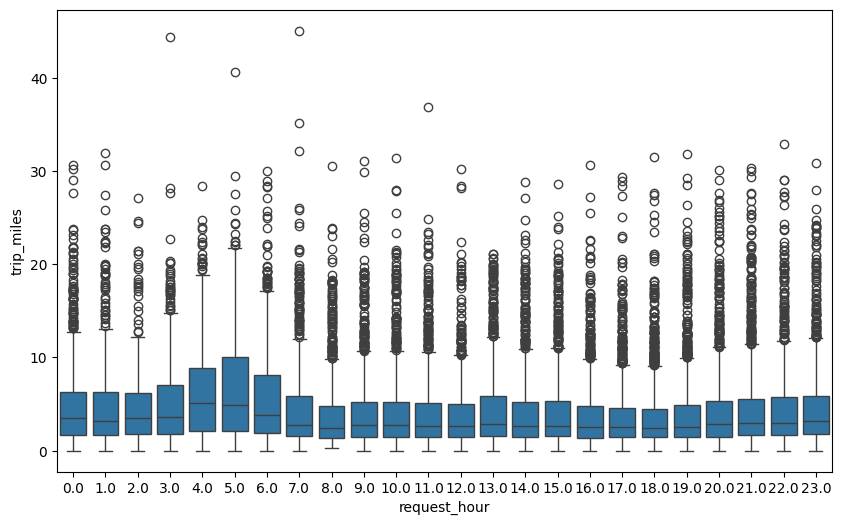

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='trip_miles', data=df2)

In [21]:
df2.shape

(23185, 11)

98.89152469268923


<Axes: xlabel='request_hour', ylabel='trip_time_real'>

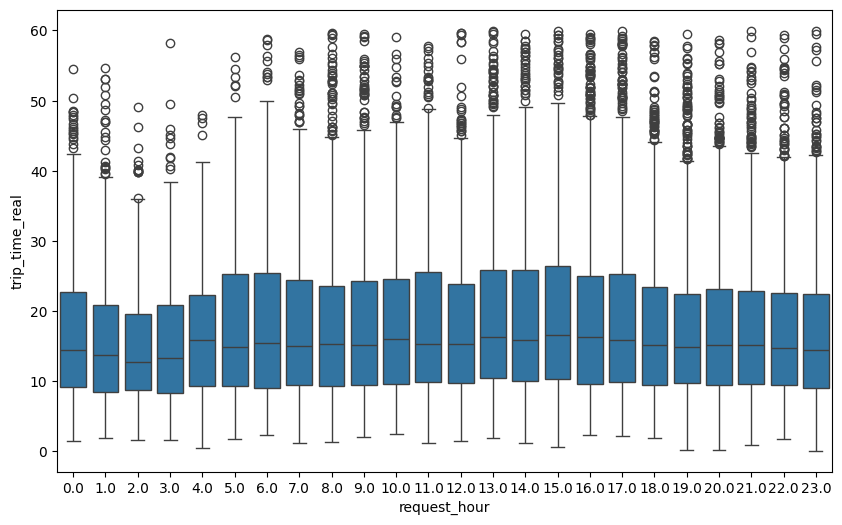

In [22]:
df3 = df2[(df2['trip_time_real'] < 60) & (df2['trip_time_real'] > 0) ]
print((len(df3)/len(df2))*100)


plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='trip_time_real', data=df3)

<Axes: xlabel='request_hour', ylabel='trip_miles'>

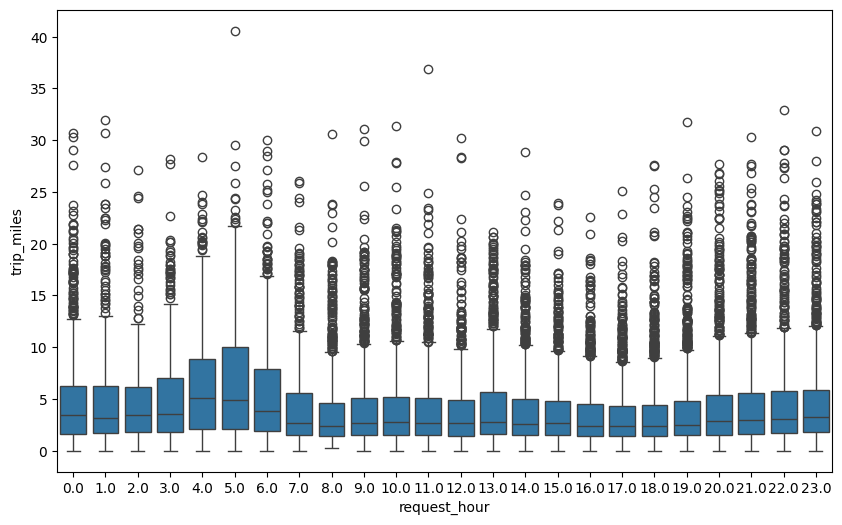

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='trip_miles', data=df3)

<Axes: xlabel='request_hour', ylabel='base_passenger_fare'>

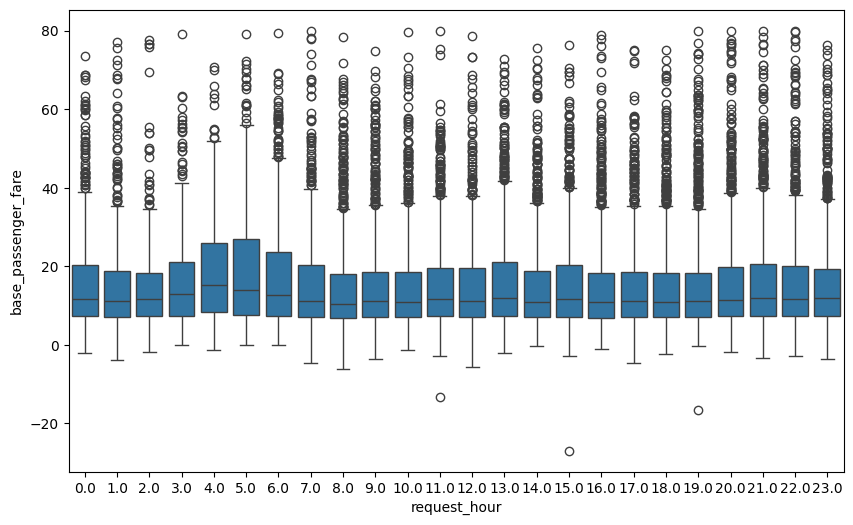

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='base_passenger_fare', data=df3)

In [25]:
df3.loc[:, 'base_fare_per_time'] = df3['base_passenger_fare']/df3['trip_time_real']

<ipython-input-25-736d86fcdb08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'base_fare_per_time'] = df3['base_passenger_fare']/df3['trip_time_real']


95.96999302163294


<Axes: xlabel='request_hour', ylabel='base_fare_per_time'>

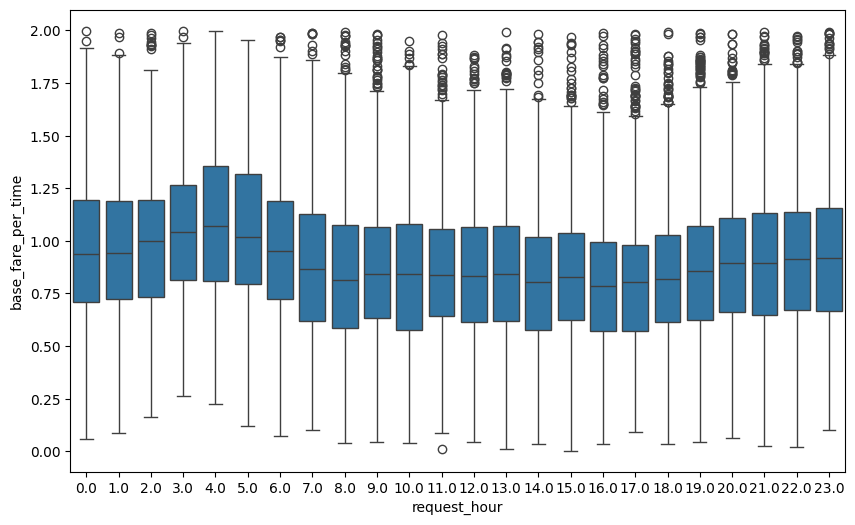

In [26]:
df4 = df3[(df3['base_fare_per_time'] < 2) &  (df3['base_fare_per_time']>0)]
print((len(df4)/len(df3))*100)


plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='base_fare_per_time', data=df4)

In [27]:
has_negative_values = (df['base_passenger_fare'] < 0).any()

In [28]:
has_negative_values

True

In [29]:
negative_rows = df[df['base_passenger_fare'] < 0]
negative_rows.head(3)

,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,congestion_surcharge,airport_fee,base_passenger_fare
140,2019-02-27 23:48:11,2019-02-27 23:54:03,2019-02-28 00:22:43,11.13,1720,0.00,None,-3.44
207,2019-02-28 21:05:58,2019-02-28 21:09:21,2019-02-28 21:16:52,1.26,451,0.00,None,-0.38
380,2019-02-07 08:48:17,2019-02-07 08:52:04,2019-02-07 09:06:25,1.41,861,0.75,None,-0.95


<ipython-input-30-1754539aebf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'trip_miles_per_time'] = df4['trip_miles']/df4['trip_time_real']


95.96999302163294


<Axes: xlabel='request_hour', ylabel='trip_miles_per_time'>

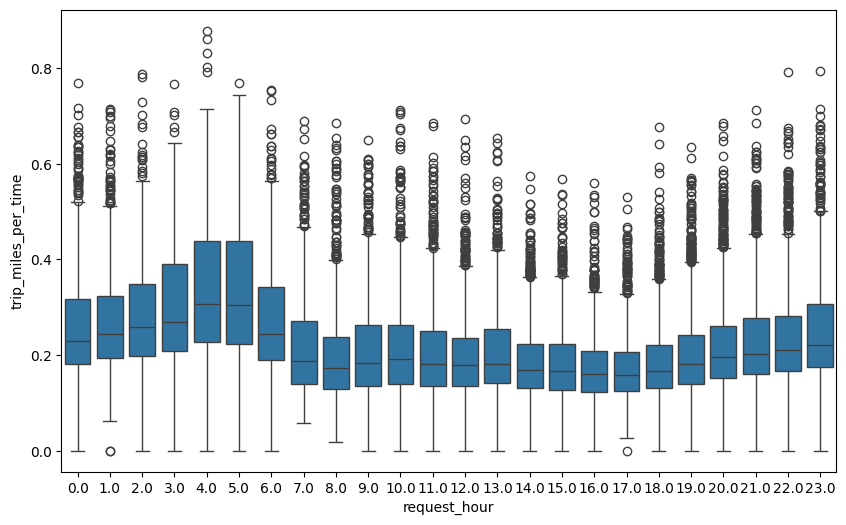

In [30]:
df4.loc[:, 'trip_miles_per_time'] = df4['trip_miles']/df4['trip_time_real']
print((len(df4)/len(df3))*100)


plt.figure(figsize=(10, 6))
sns.boxplot(x='request_hour', y='trip_miles_per_time', data=df4)